In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.Keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
print(len(test_labels))
print(len(train_labels))
test_labels

10000
60000


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

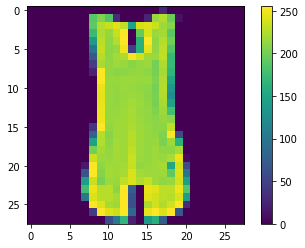

In [8]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

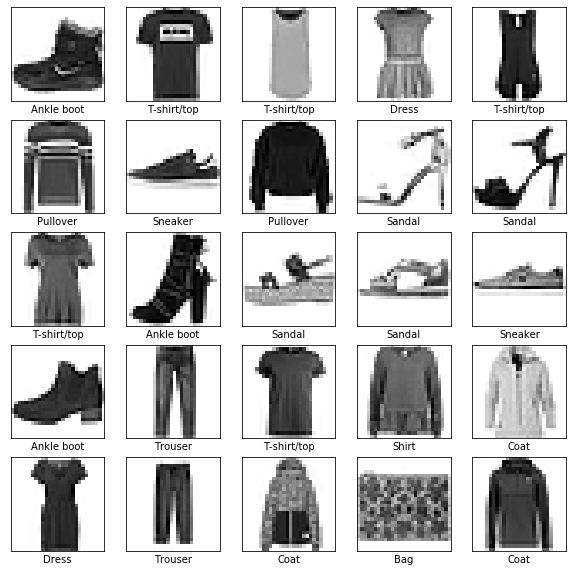

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [114]:
#copy pasted model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [98]:
#experimentation model 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(96, activation=tf.nn.relu),
    #keras.layers.Dense(64, activation=tf.nn.relu),
    #keras.layers.Dense(48, activation=tf.nn.relu),
    #keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [93]:
#experimentation model 2

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(96, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(48, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [110]:
#experimentation model 3: retarded

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [115]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [116]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4973 - acc: 0.8258
Epoch 2/3
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3754 - acc: 0.8644
Epoch 3/3
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3372 - acc: 0.8788


In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 46us/sample - loss: 0.3906 - acc: 0.8612
Test accuracy: 0.8612


In [102]:
predictions = model.predict(test_images)

In [118]:
predictions[0]

array([6.4971123e-06, 2.9086107e-06, 1.0944311e-06, 3.5902060e-06,
       5.6029307e-07, 6.2076706e-03, 1.8993893e-05, 2.2750691e-02,
       4.0889350e-05, 9.7096711e-01], dtype=float32)

In [119]:
np.argmax(predictions[0])

9

In [120]:
test_labels[0]

9

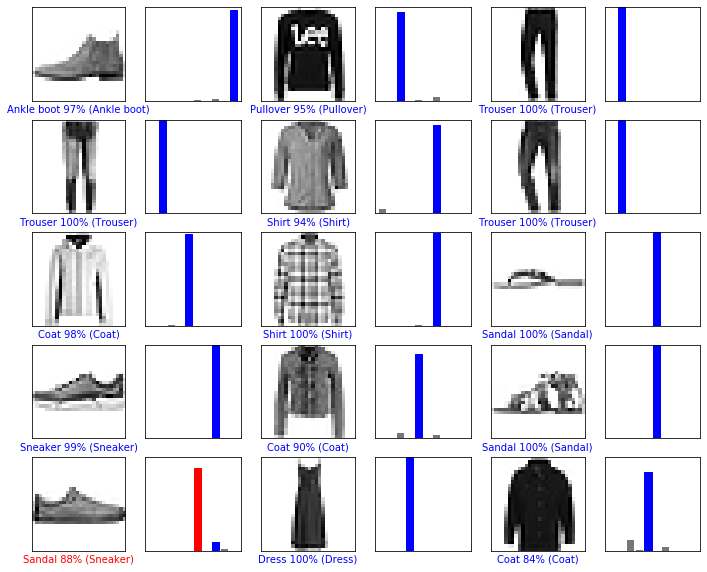

In [126]:
def plot_image(i, predictions, true_label, img):
    predictions, true_label, img = predictions[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                        100*np.max(predictions),
                        class_names[true_label]),
                        color=color)

        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
